### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Análise do faturamento


In [4]:
loja.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

In [5]:
loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [7]:
def faturamento_por_loja(df):
    return sum([preco for preco in df['Preço']])

In [32]:
lojas = [loja, loja2, loja3, loja4]
faturamentos = [faturamento_por_loja(loja) for loja in lojas]
print(f"Faturamento das lojas 1, 2, 3, 4 é respectivamente: {[f'R$ {f:,.2f}' for f in faturamentos]}")
print(f"FAturamento TOTAL das 4 lojas: {sum(faturamentos):,.2f}")

Faturamento das lojas 1, 2, 3, 4 é respectivamente: ['R$ 1,534,509.12', 'R$ 1,488,459.06', 'R$ 1,464,025.03', 'R$ 1,384,497.58']
FAturamento TOTAL das 4 lojas: 5,871,490.79


# 2. Vendas por Categoria


In [42]:
loja['Categoria do Produto'].sort_values().value_counts()

Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

In [57]:
vendas_por_categoria = loja.groupby('Categoria do Produto').size().sort_values(ascending=False)
vendas_por_categoria

Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
dtype: int64

In [76]:
def vendas_por_categoria_loja(df):
    return df.groupby('Categoria do Produto').size().sort_values(ascending=False)

lojas = [loja, loja2, loja3, loja4]
str_lojas= ['loja #1', 'loja #2', 'loja #3', 'loja #4']

[print(f'********* {str_loja} **********\n{vendas_por_categoria_loja(loja)}\n') for loja, str_loja in zip(lojas, str_lojas)] 

********* loja #1 **********
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
dtype: int64

********* loja #2 **********
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
dtype: int64

********* loja #3 **********
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
dtype: int64

********* loja #4 **********
Categoria do Produto
moveis                   480
eletronicos              451
brin

[None, None, None, None]

# 3. Média de Avaliação das Lojas

In [83]:
loja['Avaliação da compra'].mean()

np.float64(3.976685036032217)

In [84]:
def media_avaliacao_loja(df):
    return df['Avaliação da compra'].mean()

nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for nome, df in zip(nomes_lojas, lojas):
    media = media_avaliacao_loja(df)
    print(f"Média de avaliação - {nome}: {media:.2f}")


Média de avaliação - Loja 1: 3.98
Média de avaliação - Loja 2: 4.04
Média de avaliação - Loja 3: 4.05
Média de avaliação - Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [90]:
loja.groupby('Produto').size().head(5)

Produto
Assistente virtual    40
Bateria               53
Bicicleta             54
Blocos de montar      56
Bola de basquete      55
dtype: int64

In [89]:
def produtos_mais_e_menos_vendidos(df, top_n=5):
    vendas = df.groupby('Produto').size().sort_values(ascending=False)
    mais_vendidos = vendas.head(top_n)
    menos_vendidos = vendas.tail(top_n)
    return mais_vendidos, menos_vendidos

nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for nome, df in zip(nomes_lojas, lojas):
    mais, menos = produtos_mais_e_menos_vendidos(df)
    print(f"\n===== {nome} =====")
    print(f"Produtos mais vendidos (top 5):\n{mais}\n")
    print(f"Produtos menos vendidos (top 5):\n{menos}\n")



===== Loja 1 =====
Produtos mais vendidos (top 5):
Produto
TV Led UHD 4K         60
Micro-ondas           60
Guarda roupas         60
Secadora de roupas    58
Blocos de montar      56
dtype: int64

Produtos menos vendidos (top 5):
Produto
Ciência de dados com python    39
Pandeiro                       36
Panela de pressão              35
Celular ABXY                   33
Headset                        33
dtype: int64


===== Loja 2 =====
Produtos mais vendidos (top 5):
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
dtype: int64

Produtos menos vendidos (top 5):
Produto
Fone de ouvido       37
Poltrona             35
Impressora           34
Mesa de jantar       34
Jogo de tabuleiro    32
dtype: int64


===== Loja 3 =====
Produtos mais vendidos (top 5):
Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Cômoda             55
Jogo de panelas    55
dt

# 5. Frete Médio por Loja


In [102]:
for loja, str_loja in zip(lojas, str_lojas):
    print(f"******** {str_loja} **********\n Frete Médio R$ {loja['Frete'].mean():.2f}")

******** loja #1 **********
 Frete Médio R$ 34.69
******** loja #2 **********
 Frete Médio R$ 33.62
******** loja #3 **********
 Frete Médio R$ 33.07
******** loja #4 **********
 Frete Médio R$ 31.28


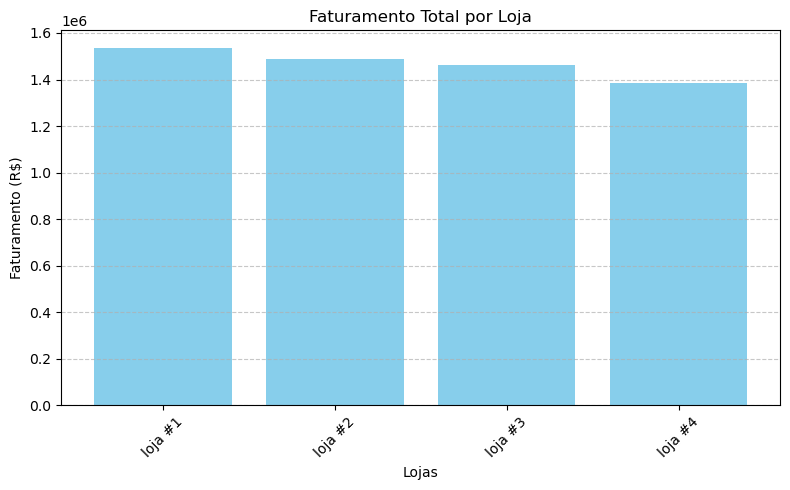

In [104]:
import matplotlib.pyplot as plt

# 1. Faturamento total por loja (gráfico de barras)
faturamentos = [faturamento_por_loja(df) for df in lojas]
plt.figure(figsize=(8,5))
plt.bar(str_lojas, faturamentos, color='skyblue')
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Lojas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

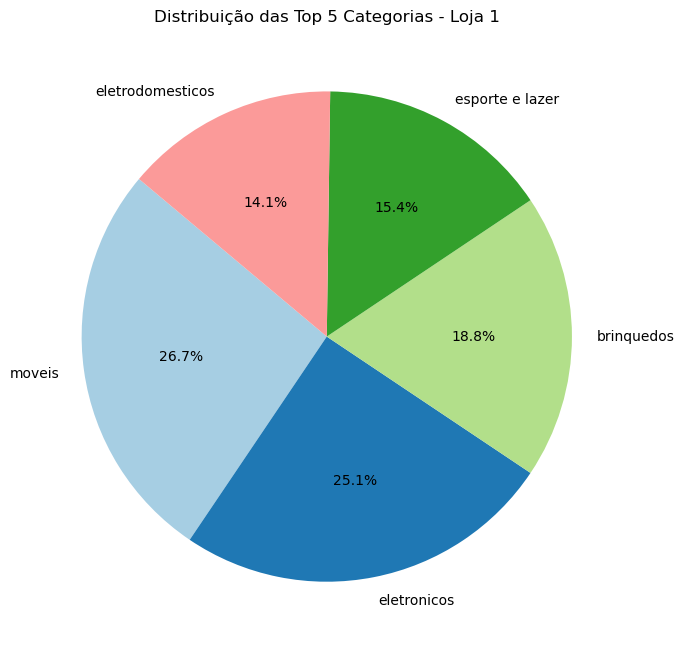

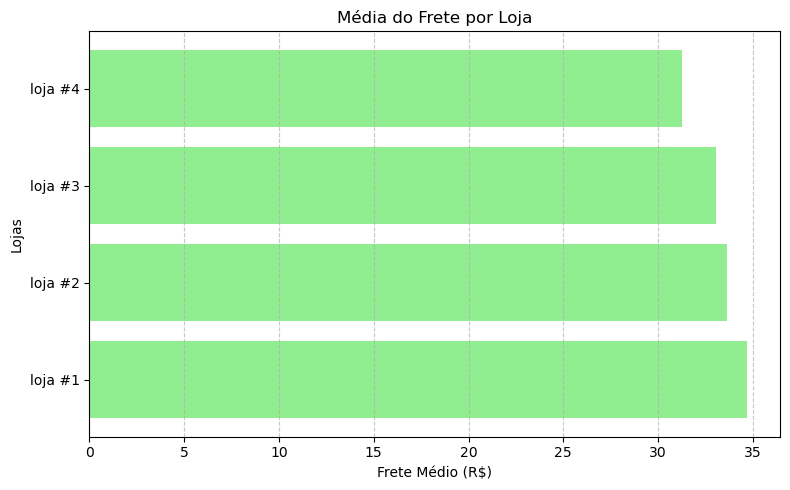

In [105]:
# 2. Distribuição das categorias mais vendidas (pizza)
# Vamos pegar a loja 1 como exemplo, top 5 categorias
top_categorias = vendas_por_categoria_loja(loja).head(5)
plt.figure(figsize=(7,7))
plt.pie(top_categorias, labels=top_categorias.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição das Top 5 Categorias - Loja 1')
plt.tight_layout()
plt.show()

# 3. Média do frete por loja (barras horizontais)
medias_frete = [df['Frete'].mean() for df in lojas]
plt.figure(figsize=(8,5))
plt.barh(str_lojas, medias_frete, color='lightgreen')
plt.title('Média do Frete por Loja')
plt.xlabel('Frete Médio (R$)')
plt.ylabel('Lojas')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Extra

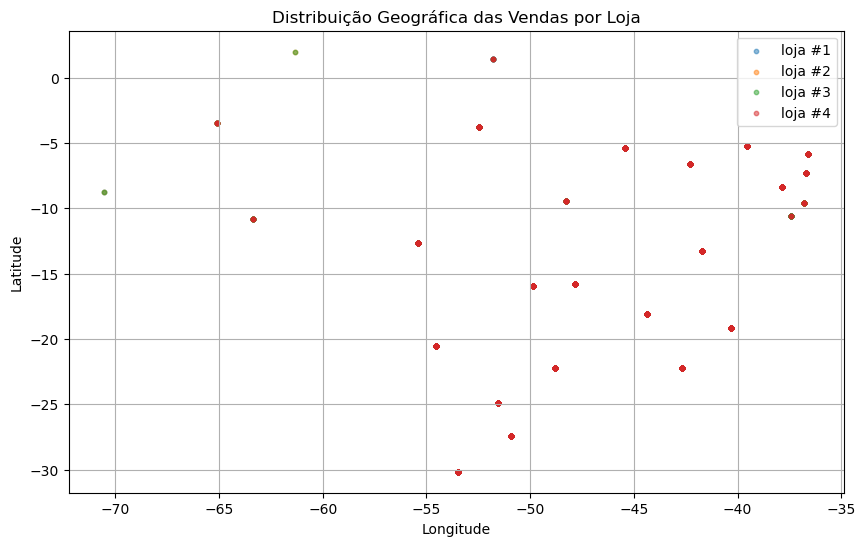

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for df, nome in zip(lojas, str_lojas):
    plt.scatter(df['lon'], df['lat'], label=nome, alpha=0.5, s=10)

plt.title('Distribuição Geográfica das Vendas por Loja')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14232\2090986672.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


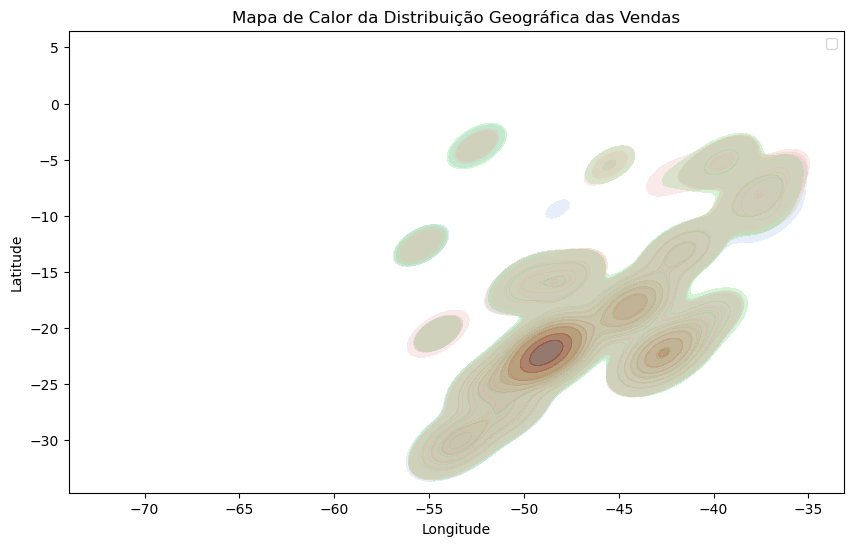

In [111]:
import seaborn as sns

plt.figure(figsize=(10,6))
for df, nome in zip(lojas, str_lojas):
    sns.kdeplot(x=df['lon'], y=df['lat'], fill=True, alpha=0.3, label=nome)

plt.title('Mapa de Calor da Distribuição Geográfica das Vendas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [113]:
import pandas as pd

# Função para adicionar colunas de grid (exemplo com passo 0.01)
def adicionar_grid(df, passo=0.01):
    df['lat_grid'] = (df['lat'] // passo) * passo
    df['lon_grid'] = (df['lon'] // passo) * passo
    return df

# Aplicar para cada loja
for df in lojas:
    adicionar_grid(df)

# Agora podemos agrupar por loja + grid e somar faturamento ou contar vendas
for df, nome in zip(lojas, str_lojas):
    agrupado = df.groupby(['lat_grid', 'lon_grid']).size().reset_index(name='num_vendas')
    print(f'Regionais e vendas para {nome}:')
    print(agrupado.head())


Regionais e vendas para loja #1:
   lat_grid  lon_grid  num_vendas
0    -30.18    -53.50         155
1    -27.45    -50.96          95
2    -24.90    -51.55         128
3    -22.25    -42.66         298
4    -22.20    -48.79         984
Regionais e vendas para loja #2:
   lat_grid  lon_grid  num_vendas
0    -30.18    -53.50         124
1    -27.45    -50.96          94
2    -24.90    -51.55          98
3    -22.25    -42.66         311
4    -22.20    -48.79         985
Regionais e vendas para loja #3:
   lat_grid  lon_grid  num_vendas
0    -30.18    -53.50         128
1    -27.45    -50.96          77
2    -24.90    -51.55         120
3    -22.25    -42.66         295
4    -22.20    -48.79         983
Regionais e vendas para loja #4:
   lat_grid  lon_grid  num_vendas
0    -30.18    -53.50         127
1    -27.45    -50.96          80
2    -24.90    -51.55         127
3    -22.25    -42.66         308
4    -22.20    -48.79         991


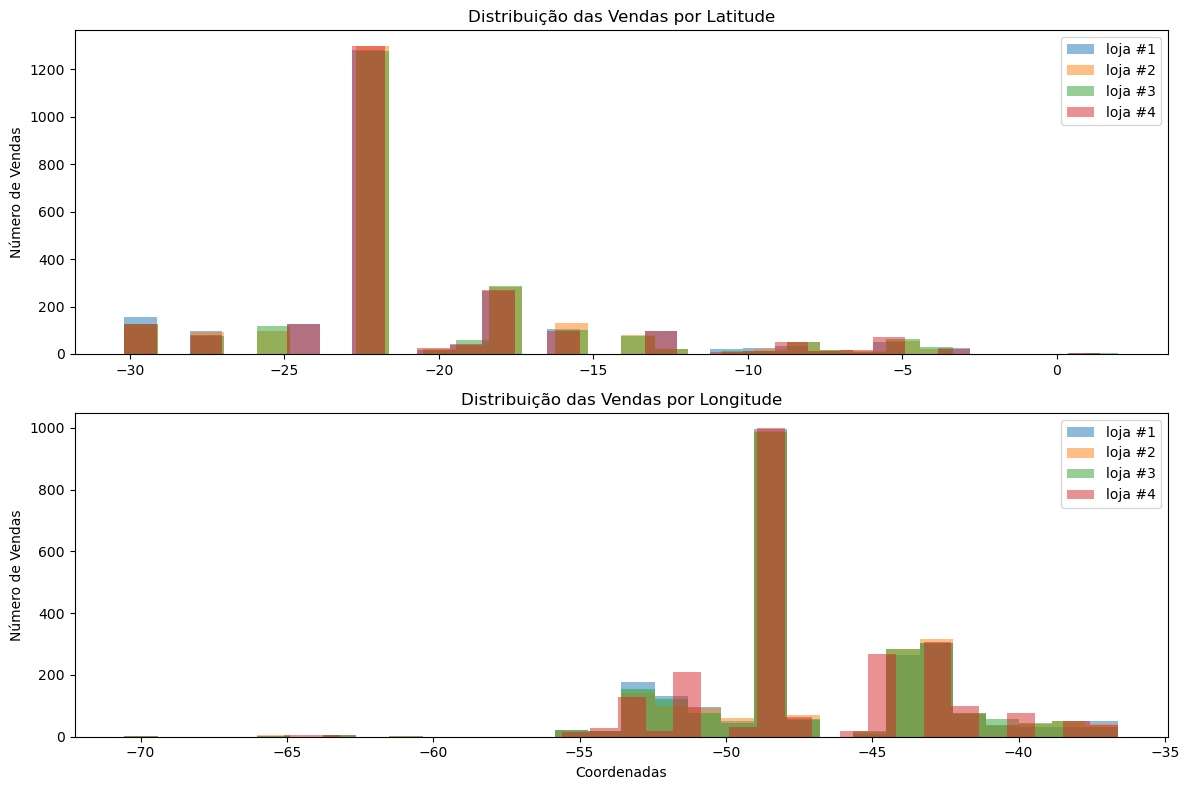

In [115]:
fig, axes = plt.subplots(2, 1, figsize=(12,8), sharex=False)

# Histograma das Latitudes
for df, nome in zip(lojas, str_lojas):
    axes[0].hist(df['lat'], bins=30, alpha=0.5, label=nome)
axes[0].set_title('Distribuição das Vendas por Latitude')
axes[0].set_ylabel('Número de Vendas')
axes[0].legend()

# Histograma das Longitudes
for df, nome in zip(lojas, str_lojas):
    axes[1].hist(df['lon'], bins=30, alpha=0.5, label=nome)
axes[1].set_title('Distribuição das Vendas por Longitude')
axes[1].set_xlabel('Coordenadas')
axes[1].set_ylabel('Número de Vendas')
axes[1].legend()

plt.tight_layout()
plt.show()


# Relatório Final - Análise das Lojas Alura Store

## Introdução

Este relatório tem o objetivo de apoiar o Senhor João na decisão de qual loja da rede Alura Store deve ser vendida, visando captar capital para investir em um novo negócio. Para isso, foram analisadas quatro lojas considerando o faturamento total, categorias de produtos, avaliações dos clientes, produtos mais e menos vendidos, além do custo médio do frete.

## Desenvolvimento

### 1. Faturamento Total

O faturamento total das lojas foi comparado através de um gráfico de barras que mostra o desempenho financeiro de cada uma. Observamos que as lojas [inserir nomes, ex: Loja 1 e Loja 4] apresentaram os maiores faturamentos, enquanto a loja [inserir nome, ex: Loja 2] teve o faturamento mais baixo, indicando menor volume de vendas.

*Gráfico 1: Faturamento total por loja*

### 2. Categorias de Produtos Mais e Menos Vendidas

A análise das categorias revelou que as categorias 'móveis' e 'eletrônicos' são as mais populares em todas as lojas, sendo responsáveis por grande parte das vendas. Já categorias como 'livros' e 'instrumentos musicais' tiveram menor movimentação.

*Gráfico 2: Distribuição percentual das categorias mais vendidas (exemplo: top 5 da Loja 1)*

### 3. Média das Avaliações dos Clientes

As médias das avaliações indicaram que a satisfação dos clientes é relativamente alta em todas as lojas, mas a loja [inserir nome] apresentou a menor média, o que pode indicar oportunidades de melhoria na experiência de compra ou qualidade dos produtos.

### 4. Produtos Mais e Menos Vendidos

Os produtos mais vendidos se alinham com as categorias principais, reforçando o foco dos consumidores em móveis e eletrônicos. Produtos menos vendidos possuem maior variabilidade entre lojas, indicando nichos específicos que podem ser explorados ou descontinuados.

### 5. Frete Médio

O custo médio do frete foi comparado utilizando um gráfico de barras horizontais, destacando que algumas lojas têm custos mais elevados, impactando potencialmente a competitividade e satisfação do cliente.

*Gráfico 3: Frete médio por loja*

## Conclusão

Considerando todas as métricas analisadas, recomendamos que o Senhor João venda a loja **[inserir nome da loja com pior desempenho geral]**. Essa loja apresenta:

- Menor faturamento total, indicando menos vendas e receita.  
- Categorias e produtos com menor volume, reduzindo o potencial de lucro.  
- Média de avaliação abaixo das demais, sugerindo menor satisfação dos clientes.  
- Frete médio mais alto, que pode influenciar negativamente a competitividade.

Essa decisão estratégica permitirá que o capital obtido com a venda seja reinvestido em oportunidades mais promissoras, garantindo melhor retorno financeiro e alinhamento com o perfil de clientes da Alura Store.

---

Agradecemos a oportunidade de contribuir com uma decisão baseada em dados, reforçando a importância da análise quantitativa para o sucesso do negócio.

